# Importing Various Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Loading The Dataset

In [2]:
df = pd.read_csv("Medical Price Dataset.csv")

# Display top 10 rows of dataset

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Shape of Dataset

In [4]:
df.shape

(1338, 7)

# Knowing whole information about Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Overall Statistics About Dataset

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 # df[sex,region,smoker] contains string values therefore convert into numerical values

In [8]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

# Label Encoder is used for conversion of string to integer

In [11]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])


label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])


label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Removing unnecessary data from our input and output vector

In [14]:
X = df.drop('charges' , axis=1)

In [15]:
y = df['charges']

# Train//Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y ,test_size =0.2, random_state=42)
 

In [17]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [18]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Import the models

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train , y_train)

GradientBoostingRegressor()

In [40]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)
df1 = pd.DataFrame({"Actual":y_test, "lr":y_pred1, "svm":y_pred2, "rf":y_pred3, "gbr":y_pred4})

In [41]:
df1

,Actual,lr,svm,rf,gbr
764,9095.06825,8924.407244,9548.497618,11154.736071,11001.128629
887,5272.17580,7116.295018,9493.240235,5305.048332,5840.174656
890,29330.98315,36909.013521,9648.305149,28296.323817,28001.980112
1293,9301.89355,9507.874691,9555.219911,10179.407970,9745.291602
259,33750.29180,27013.350008,9421.456253,34710.736862,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.427941,47102.643764,45431.423211
575,12222.89830,11814.555568,9625.054566,12385.911965,12465.025294
535,6067.12675,7638.107736,9504.794628,6416.333114,6974.336525
543,63770.42801,40959.081722,9604.857687,46625.497767,47862.047791


# Visualizing Actual Vs Predicted Values

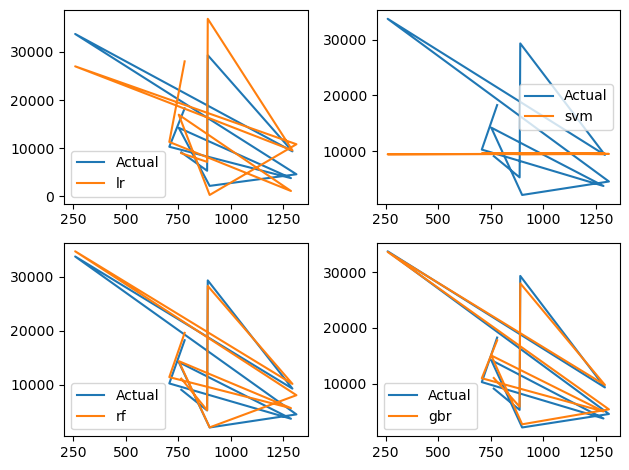

In [42]:
plt.subplot(2,2,1)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["lr"].iloc[0:11], label="lr")
plt.legend()

plt.subplot(2,2,2)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["svm"].iloc[0:11], label="svm")
plt.legend()

plt.subplot(2,2,3)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["rf"].iloc[0:11], label="rf")
plt.legend()

plt.subplot(2,2,4)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["gbr"].iloc[0:11], label="gbr")
plt.legend()

plt.tight_layout()

In [22]:
from sklearn import metrics

In [23]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [24]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07230823043884493 0.8657108010628901 0.8779726251291786


# Here model4 is performing better than any other models used above.

In [25]:
s1 = metrics.mean_absolute_error(y_test ,y_pred1)
s2 = metrics.mean_absolute_error(y_test ,y_pred2)
s3 = metrics.mean_absolute_error(y_test ,y_pred3)
s4 = metrics.mean_absolute_error(y_test ,y_pred4)

In [26]:
print(s1,s2,s3,s4)

4186.508898366435 8592.792242831822 2479.4792401840496 2447.951558054584


# Predict charges for new customer

In [27]:
df= {'age':40,
     'sex' : 1,
     'bmi' : 25,
     'children' : 3,
     'smoker' : 0 ,
     'region' : 2
    }
pred_df = pd.DataFrame(df , index=[0])

In [28]:
pred_df

,age,sex,bmi,children,smoker,region
0,40,1,25,3,0,2


In [29]:
new_pred = gr.predict(pred_df)
print(new_pred)

[7757.71875933]
